# 1. Introduction

In this notebook, we will try to gain an intuitive understanding of how machine learning works.

There are two ways to approach learning. One is a bottom-up approach where we try to understand the minutiae of theory before we solve problems using the theory. The other approach is a top-down approach where we try to intuitively understand application by *doing*.

These two approaches are explained by Jeremy Howard in his fast.ai course.

When you want to learn a sport, you do not start by understanding gravitational force, projectile motion, friction, the principle of the lever etc. You start by trying to play the sport.

In this notebook, we will try a bit of both. First, let's play.

In [0]:
# Initialization stuff
%matplotlib inline
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# For reproducibility
random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

# What is Machine Learning anyway?

Machine Learning is a lot of things, but for the purpose of this exercise, let's just say that Machine Learning is an automated way of learning a method that, given an input, produces an output that makes sense.

### A game of high or low

Imagine if I asked you to think of a number between 1 and 100. It is my job to guess the number by asking you questions. A sample interaction might go like this:

**Me:** Think of a number between 1 and 100.

**You:** (thinks of 27 as the number) Ok, I've thought of a number.

**Me:** I will guess a number and you tell me if it is higher or lower than your number. If I've guessed your number tell me that I've guessed it!

**Me:** 50?

**You:** High.

**Me:** 25?

**You:** Low.

**Me:** 37?

**You:** High.

**Me:** 31?

**You:** High.

**Me:** 28?

**You:** High.

**Me:** 26?

**You:** Low.

**Me:** Your number is 27.

Let's code my **_algorithm_** for guessing the number!

In [0]:
def generate_game(your_number, max_number):
    # Define a function to reply whether the number specified is higher thant the number thought of
    def high_or_low(my_guess):
        if your_number == my_guess:
            print("You: You guessed it!")
        elif your_number > my_guess:
            print("You: Low")
            return True
        else:
            print("You: High")
            return False
        
    def squared_error(guess, actual):
        '''
            What is the squared difference between my guess and the actual number.
            This is a numerically the "error" of my guess.
        '''
        return (actual - guess) ** 2
        
    # Define a binary search algorithm
    def binary_search(low, high, distances):
        midpoint = int((low + high) / 2)
        distances.append(squared_error(midpoint, your_number))
        if midpoint == low + 1 and midpoint == high - 1:
            print("Me: Your number is {}".format(midpoint))
        else:
            print("Me: {}?".format(midpoint))
            is_higher = high_or_low(midpoint)
            if is_higher is None:
                return
            if is_higher:
                binary_search(midpoint, high, distances)
            else:
                binary_search(low, midpoint, distances)
            
    
    print("Me: Think of a number between 1 and {}".format(max_number))
    print("You: (thinks of {}). Ok".format(your_number))
    print("Me: I will guess a number and you tell me if it is higher or lower than your number. If I've guessed your number tell me that I've guessed it!")
    distances = []
    binary_search(1, max_number, distances)
    return distances

We just generated a systematic algorithm to guess a random number! Let's try it out:

In [0]:
# Run this cell multiple times to try other numbers
errors = generate_game(27, 100)

Me: Think of a number between 1 and 100
You: (thinks of 27). Ok
Me: I will guess a number and you tell me if it is higher or lower than your number. If I've guessed your number tell me that I've guessed it!
Me: 50?
You: High
Me: 25?
You: Low
Me: 37?
You: High
Me: 31?
You: High
Me: 28?
You: High
Me: 26?
You: Low
Me: Your number is 27


We could do this for a number between 1 and 10,000 as well:

In [0]:
# Run this cell multiple times  with different values to see whats going on
errors = generate_game(598, 10000)

Me: Think of a number between 1 and 10000
You: (thinks of 598). Ok
Me: I will guess a number and you tell me if it is higher or lower than your number. If I've guessed your number tell me that I've guessed it!
Me: 5000?
You: High
Me: 2500?
You: High
Me: 1250?
You: High
Me: 625?
You: High
Me: 313?
You: Low
Me: 469?
You: Low
Me: 547?
You: Low
Me: 586?
You: Low
Me: 605?
You: High
Me: 595?
You: Low
Me: 600?
You: High
Me: 597?
You: Low
Me: 598?
You: You guessed it!


Let's look at the error of my gueses visually:

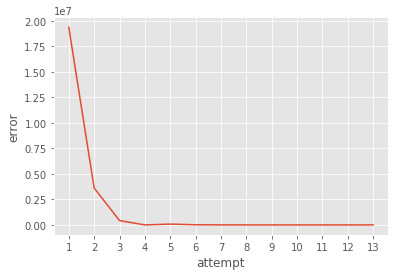

In [0]:
# Plotting first column vs second column
plt.plot(range(1, len(errors) + 1), errors)
# Label the axes
plt.ylabel('error')
plt.xlabel('attempt')
# Make the ticks correspond to the x values
plt.xticks(range(1, len(errors) + 1))
plt.show()

Congratulations! We have developed an algorithm that **_learns_** a number that it does not know by iteratively improving its guess (and decreasing the error of the guess)! This is how **_Machine Learning_** works too!

Let's start with a very simple problem. Let's assume we live in an ideal world where the price of a bunch of houses looks like this:

|Bedrooms       | Price         |
|---------------|:-------------:|
| 1             | 300,000       |
| 2	            | 500,000       |
| 3             | 700,000       |
| 4             | 900,000       |
| 5             | 1,100,000     |

When we look at the above data as a human being, we are easily able to spot patterns.

For example, we notice that when we increase the number of bedrooms by 1, the prices increases by 200,000.

Thus, we could say hmmm. Let's define this recursively.

\begin{align}
f(1) = 300,000
\end{align}
\begin{align}
f(x) = f(x-1) + 200,000
\end{align}

In [0]:
# Let's define a Python function
def price_recursive(bedrooms):
    # If less than 1 bedroom, then this does not make sense
    if bedrooms < 1:
        return None
    # If one bedroom, we know the baseline price is 300,000
    elif bedrooms == 1:
        return 300000
    # Otherwise, we spotted the pattern that the price always
    # seems 200,000 more than the price of the previous row
    else:
        return price_recursive(bedrooms - 1) + 200000

Now let's test the function!

In [0]:
# Change the number in the cell to test our theory
price_recursive(6)

1300000

Awesome! We just used our human intelligence to find a pattern in the data!

What about if we look at this data on a graph, where the x axis is the number of rooms, and the y axis is the price?

In [0]:
# First let's put our data in a matrix
data = np.asarray([[1, 300000], [2, 500000], [3, 700000], [4, 900000], [5, 1100000]])
data

array([[      1,  300000],
       [      2,  500000],
       [      3,  700000],
       [      4,  900000],
       [      5, 1100000]])

Great! Now let's plot the data to see if we can see any more patterns!

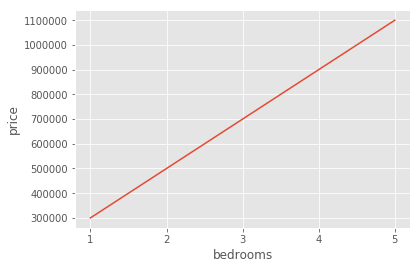

In [0]:
# Plotting first column vs second column
plt.plot(data[:, 0], data[:, 1])
# Label the axes
plt.ylabel('price')
plt.xlabel('bedrooms')
# Make the ticks correspond to the x values
plt.xticks(data[:, 0])
plt.show()

Amazing! Our human ingenuity of visualization has shown us another pattern in the data. It is linear.

So can we write a function that represents a line?

Recall that the equation of the line is defined as:

\begin{equation}
y = mx + b
\end{equation}

**_m_** is known as the slope or gradient of the line and **_b_** is a constant, which, in machine learning lingo is known as a bias term.

In [0]:
# Let's write this up as a function as well
def y(m, b, x):
    return m * x + b

# Can we define a function with a fixed m and b that returns the value of y?
# Of course we can
from functools import partial
def get_y_hat_function(m=1, b=0):
    return partial(y, m, b)

Now we can guess some values for m and b to see how the function responds:

In [0]:
my_y = get_y_hat_function(m=50000, b=100000)
my_y(1)

150000

That doesn't look right! How about we try some new values for m and b. Let's try 150,000 and 100,000:

In [0]:
my_y = get_y_hat_function(m=150000, b=100000)
my_y(1)

250000

That seems closer to the actual price! Let's try two other values: m=200,000, b=100,000

In [0]:
my_y = get_y_hat_function(m=200000, b=100000)
my_y(1)

300000

Et voila! We have found the correct values. You can try using different values for the number of bedrooms below:

In [0]:
my_y(3)

700000

## What just happened?

1. We tried to get an intuitive sense of how a machine may guess a number by **_iterative improvement_**.
2. We then took a toy dataset of housing prices with and tried to see a pattern in it.
3. As human beings, we looked at the data and first defined a function that made sense to us intuitively.
4. We checked and were reassured that the powers of human ingenuity and creativity are indeed intact and that we can think recursively!
5. Then we thought, this data looks linear, lets try to pick values of **_m_** and **_b_** that satisfy the equation of a line.
6. We tried some random values of **_m_** and **_b_**, but we found our results did not match.
7. We could see how far away our results were from the actual values
8. We tried to pick new values of **_m_** and **_b_** so that we got closer to the actual values
9. Finally we reached the ideal solution for our toy problem.

## Can we do this automatically?

The steps above seem pretty logical. Can we automate them? Can we write an algorithm that "learns" the values of **_m_** and **_b_**? 

#### An algorithm that "learns" the values of m and b (called parameters) from the given data, is a machine learning algorithm. 